In [1]:
import pandas as pd


In [2]:
true_news = pd.read_csv('true.csv')

In [3]:
true_news.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
true_news.shape

(21417, 4)

In [5]:
fake_news = pd.read_csv('fake.csv')

In [6]:
fake_news.shape

(23481, 4)

In [7]:
true_news['label' ] = 1
fake_news['label' ] = 0

In [8]:
frames = [true_news.loc[:5000][:], fake_news.loc[:5000][:]]

In [9]:
df = pd.concat(frames)

In [10]:
df.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
df.tail(5)

,title,text,subject,date,label
4996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",0
4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",0
4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016",0
4999,CNN Panelist LAUGHS In Corey Lewandowski’s Fa...,As Donald Trump s campaign continues to sink d...,News,"August 18, 2016",0
5000,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",News,"August 18, 2016",0


In [12]:
df.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [13]:
x = df. drop('label', axis=1)
y = df['label']

In [14]:
df = df.dropna()
df_copy = df.copy()

In [15]:
df_copy.reset_index(inplace=True)
df_copy.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
df_copy['combined_text'] =  df_copy['title'] + ' ' + df_copy['text'] 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df_copy['combined_text'], df_copy['label'], test_size=0.3, random_state=42)

In [19]:
# TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is commonly used in text classification tasks

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [41]:
# print tfidf_vectorizer

#terms = tfidf_vectorizer.get_feature_names_out()
#idf_values = tfidf_vectorizer.idf_

#for term, idf in zip(terms, idf_values):
    #print(f'Term: {term}, IDF: {idf}')

### Model Building - Passive Aggresive Classifier 

### Using Naives Bayes 

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [22]:
predictions = model.predict(x_test_tfidf)

In [43]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.9613462179273575

Confusion Matrix:
 [[1390   71]
 [  45 1495]]


Visualizations

In [24]:
# pip install matplotlib seaborn


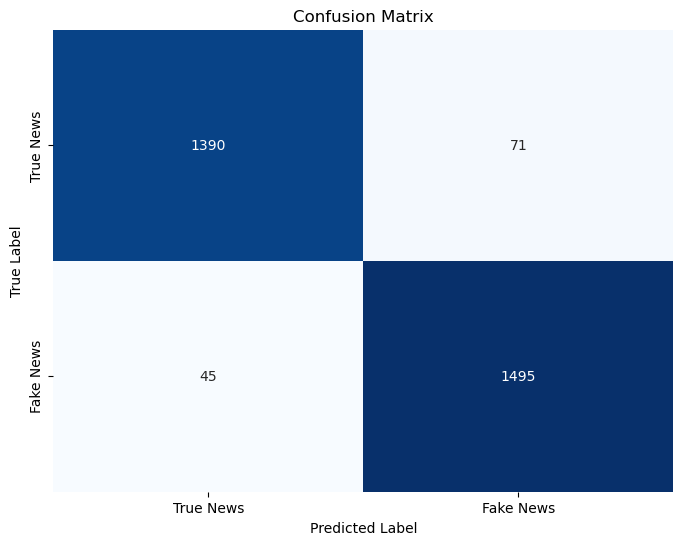

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix as a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['True News', 'Fake News'], yticklabels=['True News', 'Fake News'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Using SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train_tfidf, y_train)

SVC(kernel='linear')

In [28]:
# making predictions 

svm_predictions = svm_model.predict(x_test_tfidf)

In [42]:
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


Accuracy: 0.9966677774075309

Confusion Matrix:
 [[1455    6]
 [   4 1536]]


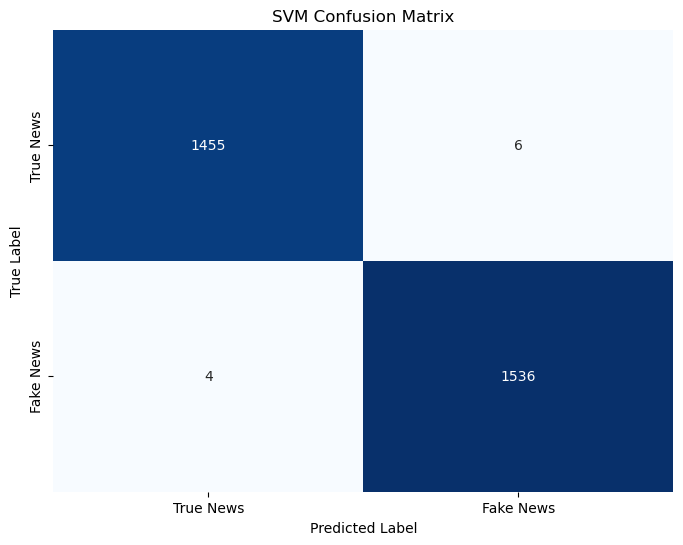

In [30]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['True News', 'Fake News'], yticklabels=['True News', 'Fake News'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

### Using Random Forest Regression


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [34]:
rf_predictions = rf_model.predict(x_test_tfidf)

In [35]:
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Accuracy: 0.9993335554815062

Confusion Matrix:
 [[1460    1]
 [   1 1539]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1461
           1       1.00      1.00      1.00      1540

    accuracy                           1.00      3001
   macro avg       1.00      1.00      1.00      3001
weighted avg       1.00      1.00      1.00      3001



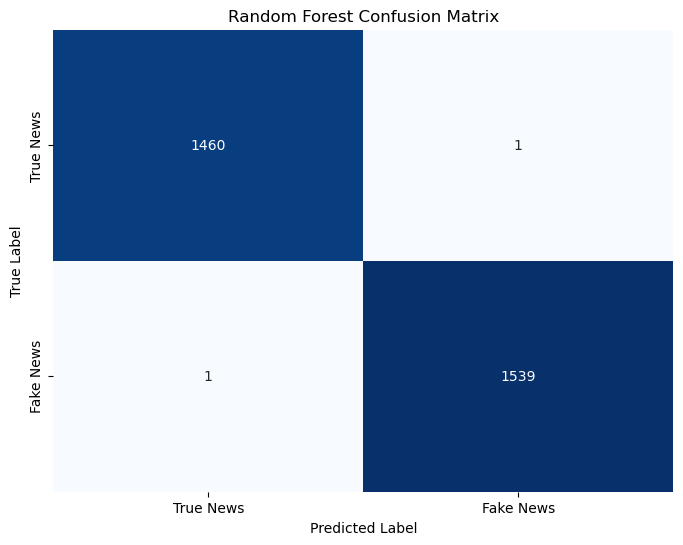

In [36]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['True News', 'Fake News'], yticklabels=['True News', 'Fake News'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

Save model and Vectorize

Random Forest Regression has high Accuracy compared to naives bayes and Support vector machine

In [37]:
import pickle

# Save the model
with open('fake_news_dectector_rf_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('fake_news_dectector_rf_model_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

In [38]:
# Can use the below code to load the model for future predictions

# Load the model
with open('fake_news_dectector_rf_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the TF-IDF vectorizer
with open('fake_news_dectector_rf_model_vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

##### Camparing pickle and joblib
joblib has better performance specially when using in HDFS but pickle is the convinient way to save and load models